### Assessing the Readiness of HEI in Malaysia to Accept Generation Alpha

---

# Data Modeling

- Creating new features from existing features
- Trimming Columns
- Handling ordinal and nominal categorical features
- Feature Selection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%%time
new_df = pd.read_hdf('../data/interim/Info_UserData_Info_Content.h5', key='user')

Wall time: 4.19 s


In [3]:
new_df.head()

,problem_number,is_correct,total_sec_taken,total_attempt_cnt,used_hint_cnt,is_hint_used,is_downgrade,is_upgrade,level,points,...,level4_id_x2xocZ2ffvV9TBpbWEd0C99XcsMY/d7WuhqSocGXF/M=,level4_id_x6ydbyAZ5cg/SPyo/WvjhfZ4RkUk89e10PElUmNMwf0=,level4_id_xwq9S3SOMEYKW8W5OavIdIhjGY5PqtNwjGvAIOS1g+Y=,level4_id_y84LImFGtQZt7uAAN9ipC5M5THCImwCk8xEYF3/BzHA=,level4_id_yAzQR919g6E/LcFFdUOg/UDlVYQtRNHvS19zOJV2V/o=,level4_id_yFIhXSdRiIbnAJXjpjveYhhXopOOxVcUHbLdetuOIEc=,level4_id_ydx3O+QKc8BXLVlrYy2opLQARV0qYy6CUvHFZn2Eths=,level4_id_zI1qYT7KOxUn/HpISafbc4uU5cg4H+Vpd/DB9QzVOPg=,level4_id_zMYuCCkIy21KGCJ6fnAHFAXbm2tJyKjVNlL/3d9WiUI=,level4_id_zyVjBuMRkEs/hVTbayt34VrOAU1KNtk5Tt0EvU+/xhk=
0,12,7.0,89.800000,1.600000,0.500000,3.0,0.0,1.0,1,9533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,74.250000,1.500000,3.250000,4.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,1.0,24.571429,1.428571,3.142857,6.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8,3.0,37.750000,1.125000,1.875000,5.0,0.0,0.0,0,8027,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,26,15.0,14.923077,1.500000,0.423077,11.0,0.0,1.0,1,73838,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Splitting Train Set and Test Set

In [4]:
features = ['problem_number', 'is_correct', 'total_sec_taken', 'total_attempt_cnt', 'used_hint_cnt', 'is_hint_used', 'is_upgrade', 'points', 'badges_cnt', 'user_grade', 'has_teacher_cnt', 'is_self_coach', 'belongs_to_class_cnt', 'date_count']
target = ['level']

In [5]:
from sklearn.model_selection import train_test_split

X = new_df[features]
y = new_df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((361921, 14), (120641, 14), (361921, 1), (120641, 1))

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train)
print(X_test)

[[-0.43723219 -0.19997766 -0.65892929 ... -0.41879831 -0.13050897
  -0.37702454]
 [ 0.31917652  0.80924096  0.29102036 ...  0.36711028 -0.42439126
  -0.37702454]
 [-0.76140735 -0.70458697 -0.16478508 ... -0.75561628  0.45725561
  -0.37702454]
 ...
 [-0.11305703 -0.03177455 -0.01142998 ... -0.08198034  0.45725561
   2.85300268]
 [-0.43723219 -0.19997766 -0.37948222 ... -0.41879831 -0.42439126
  -0.37702454]
 [-0.43723219 -0.19997766 -0.27383759 ... -0.41879831 -0.42439126
  -0.37702454]]
[[-0.43723219 -0.19997766 -0.57373201 ... -0.41879831 -0.13050897
  -0.37702454]
 [-0.43723219 -0.19997766  0.1487409  ... -0.41879831 -0.42439126
   0.6996512 ]
 [-0.43723219 -0.19997766 -0.6521135  ... -0.41879831 -0.13050897
  -0.37702454]
 ...
 [-0.54529058 -0.70458697 -0.34369936 ... -0.53107096 -0.13050897
   0.10149801]
 [ 0.21111813  0.47283476 -0.11366671 ...  0.25483763 -0.13050897
  -0.2573939 ]
 [ 1.72393556  1.98666269 -0.62212406 ...  1.82665481 10.74313569
   0.46038993]]


In [10]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\likwe\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[47492     2     1     0     1]
 [    3 53058   110    30    29]
 [   30   806  6166   378   203]
 [   22   341   716  2276   911]
 [   14   178   454   696  6724]]


0.9591763993998723

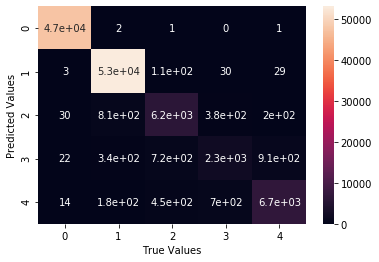

In [14]:
import seaborn as sns
ax = sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
ax.set(xlabel='True Values', ylabel='Predicted Values')
plt.show()

## SVM

In [ ]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\likwe\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

### XGBoost

In [9]:
# Training XGBoost on the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

C:\Users\likwe\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\likwe\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[47492     0     2     1     1]
 [    3 53041   112    37    37]
 [   25   727  6298   284   249]
 [   21   247   585  2431   982]
 [    9    99   296   405  7257]]


0.965832511335284

In [12]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

C:\Users\likwe\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\likwe\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 96.50 %
Standard Deviation: 0.05 %
